In [3]:
# Imports
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout
from sklearn.metrics import confusion_matrix
import seaborn as sns

np.random.seed(0)

In [4]:
# Fetch MNIST Dataset
from keras.datasets import mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


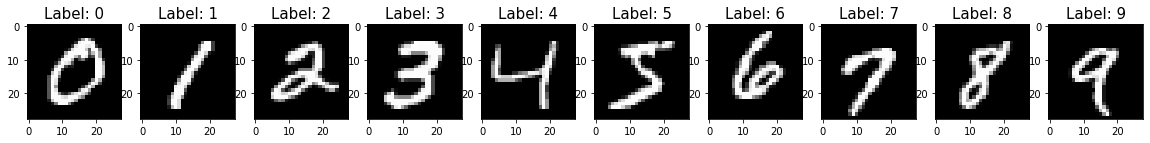

In [5]:
# Print Example Data
  # No need for "class balancing"

num_classes = 10
f, ax = plt.subplots(1, num_classes, figsize=(20,20))

for i in range (num_classes):
  sample = x_train[y_train == i][0]
  ax[i].imshow(sample, cmap = 'gray')
  ax[i].set_title("Label: {}".format(i), fontsize = 15)

In [6]:
# Print Labels

for i in range (10):
  print(y_train[i], end = " ")

5 0 4 1 9 2 1 3 1 4 

In [7]:
# P: Each image labeled with an int value, potential that model may guess a non-discrete value ex: 4.5

# Create vector of length = num_classes for each item in y_train/test set
# Each vector contains a bin value for the presence / absecene of a value at index: i = val - 1

y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

for i in range(10):
  print(y_train[i])

[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
[0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]


In [8]:
# Normalize dataset
x_train = x_train / 255.0
x_test = x_test / 255.0

# Reshape Data
  # Turn training data into a single vector dim(v) = 784
x_train = x_train.reshape(x_train.shape[0], -1)
x_test = x_test.reshape(x_test.shape[0], -1)


In [9]:
# Model

model = Sequential()

model.add(Dense(units=128, input_shape=(784, ), activation ='relu'))
model.add(Dense(units=128, activation ='relu'))
model.add(Dropout(.25)) # 25% of nuerons removed during training
model.add(Dense(units = 10, activation ='softmax')) # Assigns correctness probability for each class

# Categorical Crossentropy: Loss function for multiple classes
# Adam Optimizer: Standard

model.compile(loss = 'categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 128)               16512     
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_2 (Dense)             (None, 10)                1290      
                                                                 
Total params: 118,282
Trainable params: 118,282
Non-trainable params: 0
_________________________________________________________________


In [10]:
# Training Params

batch_size = 512
epochs = 10
model.fit(x=x_train, y=y_train, batch_size=batch_size, epochs=epochs)

Epoch 1/10
118/118 [==============================] - 4s 25ms/step - loss: 0.5756 - accuracy: 0.8351
Epoch 2/10
118/118 [==============================] - 2s 20ms/step - loss: 0.2251 - accuracy: 0.9342
Epoch 3/10
118/118 [==============================] - 3s 23ms/step - loss: 0.1669 - accuracy: 0.9507
Epoch 4/10
118/118 [==============================] - 2s 13ms/step - loss: 0.1305 - accuracy: 0.9614
Epoch 5/10
118/118 [==============================] - 1s 11ms/step - loss: 0.1089 - accuracy: 0.9686
Epoch 6/10
118/118 [==============================] - 1s 10ms/step - loss: 0.0913 - accuracy: 0.9727
Epoch 7/10
118/118 [==============================] - 1s 12ms/step - loss: 0.0778 - accuracy: 0.9767
Epoch 8/10
118/118 [==============================] - 2s 17ms/step - loss: 0.0675 - accuracy: 0.9796
Epoch 9/10
118/118 [==============================] - 2s 14ms/step - loss: 0.0593 - accuracy: 0.9818
Epoch 10/10
118/118 [==============================] - 1s 11ms/step - loss: 0.0518 - accura

In [11]:
# Evaluation

test_loss, test_acc = model.evaluate(x_test, y_test)
print("Test Loss: {}, Test Accuracy: {}".format(test_loss, test_acc))

313/313 [==============================] - 1s 2ms/step - loss: 0.0762 - accuracy: 0.9768
Test Loss: 0.07621926069259644, Test Accuracy: 0.9768000245094299


In [12]:
y_pred = model.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis = 1)

print(y_pred)
print(y_pred_classes) # Retuns largest probable value's index from each row

313/313 [==============================] - 1s 3ms/step
[[3.2972943e-07 5.5321863e-07 3.1610376e-05 ... 9.9993712e-01
  1.3539750e-07 7.7321365e-06]
 [2.3554421e-06 2.3893657e-04 9.9970353e-01 ... 4.8328133e-08
  2.0820540e-05 1.1803616e-10]
 [6.3554294e-06 9.9581140e-01 4.1026127e-04 ... 2.7360537e-03
  3.6591131e-04 8.0116897e-06]
 ...
 [2.4713726e-10 8.2750589e-08 1.7094627e-09 ... 5.0543872e-06
  1.0003131e-06 1.5363796e-05]
 [1.7699918e-09 4.3171919e-09 2.1322331e-10 ... 1.2231390e-09
  3.2747885e-05 9.9783626e-10]
 [1.6546078e-07 3.5460573e-08 1.0379229e-08 ... 9.8233789e-11
  6.2006880e-09 4.4281645e-08]]
[7 2 1 ... 4 5 6]


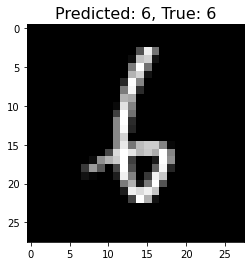

In [13]:
# Example Image

random_idx = np.random.choice(len(x_test))
x_sample = x_test[random_idx]
y_true = np.argmax(y_test, axis = 1)
y_sample_true = y_true[random_idx]
y_sample_pred_class = y_pred_classes[random_idx]

plt.title("Predicted: {}, True: {}".format(y_sample_pred_class, y_sample_true), fontsize = 16)
plt.imshow(x_sample.reshape(28, 28), cmap = 'gray')